In [1]:
import numpy as np
import os
import sys
import warnings
import pandas as pd
import matplotlib.cm as cm
from scipy.interpolate import griddata
import scipy.interpolate as scintrp
import matplotlib.pyplot as plt

from matplotlib.backends.backend_pdf import PdfPages
from scipy.signal import savgol_filter as smooth

# import vtk
import vtkmodules.all as vtk
from vtk.util.numpy_support import vtk_to_numpy

import wind


In [2]:

vtkFile = r'..\data\ttuMSfl0450.0\postProcessing\wallPressure\55.69\p_building.vtk'

print(vtkFile)

..\data\ttuMSfl0450.0\postProcessing\wallPressure\55.69\p_building.vtk


In [3]:
reader = vtk.vtkPolyDataReader()
reader.SetFileName(vtkFile)
reader.ReadAllFieldsOn()

reader.Update()

In [9]:

polydata = reader.GetOutput()
nCells = polydata.GetNumberOfCells()
cellCenters = np.empty([nCells,3])

for i in range(nCells):
   pts = polydata.GetCell(i).GetPoints()    
   cell_i_vrtx = np.array([pts.GetPoint(i) for i in range(pts.GetNumberOfPoints())])
   cellCenters[i,:] = np.mean(cell_i_vrtx,axis=0)
   #print(cellCenters[i,:])



# # Get the coordinates of nodes in the mesh
# nodes_vtk_array= polydata.GetPoints().GetData()
# #Get the coordinates of the nodes and their p's
# nodes_nummpy_array = vtk_to_numpy(nodes_vtk_array)
# x,y,z= nodes_nummpy_array[:,0] , nodes_nummpy_array[:,1] , nodes_nummpy_array[:,2]


#The "p" field is the first scalar in my vtk file


p = vtk_to_numpy(polydata.GetCellData().GetArray(0))


print(np.shape(p))


(309806,)


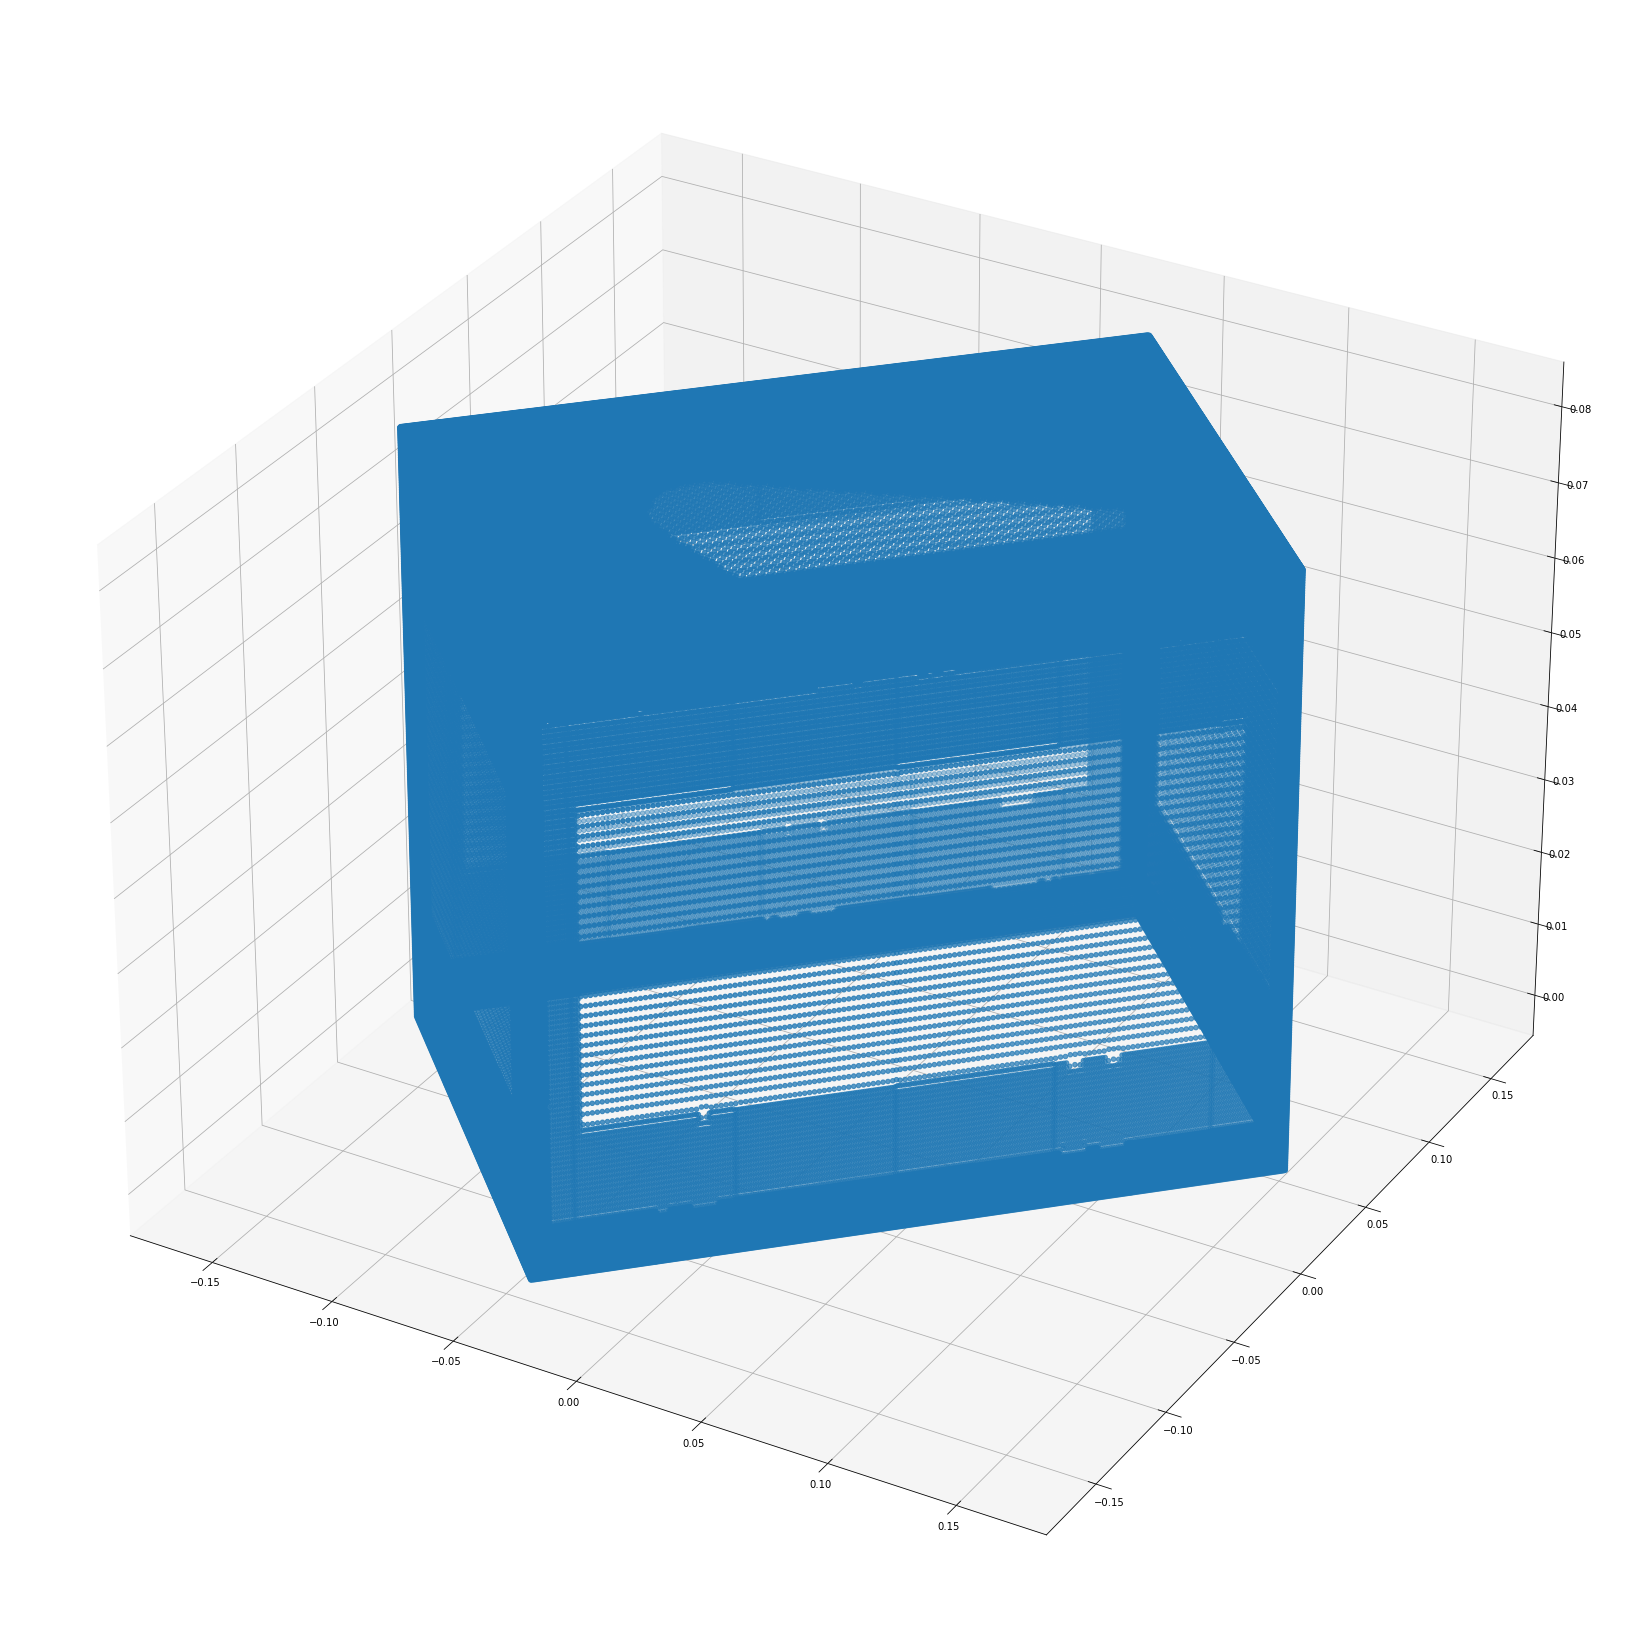

In [15]:

fig = plt.figure(figsize=[40,30])
ax = fig.add_subplot(projection='3d')
ax.scatter(cellCenters[:,0],cellCenters[:,1],cellCenters[:,2])
plt.show()

In [ ]:
from pathlib import Path

from vtkmodules.vtkIOGeometry import (
    vtkBYUReader,
    vtkOBJReader,
    vtkSTLReader
)
from vtkmodules.vtkIOLegacy import vtkPolyDataReader
from vtkmodules.vtkIOPLY import vtkPLYReader
from vtkmodules.vtkIOXML import vtkXMLPolyDataReader


def ReadPolyData(file_name):
    valid_suffixes = ['.g', '.obj', '.stl', '.ply', '.vtk', '.vtp']
    path = Path(file_name)
    if path.suffix:
        ext = path.suffix.lower()
    if path.suffix not in valid_suffixes:
        print(f'No reader for this file suffix: {ext}')
        return None
    else:
        if ext == ".ply":
            reader = vtkPLYReader()
            reader.SetFileName(file_name)
            reader.Update()
            poly_data = reader.GetOutput()
        elif ext == ".vtp":
            reader = vtkXMLPolyDataReader()
            reader.SetFileName(file_name)
            reader.Update()
            poly_data = reader.GetOutput()
        elif ext == ".obj":
            reader = vtkOBJReader()
            reader.SetFileName(file_name)
            reader.Update()
            poly_data = reader.GetOutput()
        elif ext == ".stl":
            reader = vtkSTLReader()
            reader.SetFileName(file_name)
            reader.Update()
            poly_data = reader.GetOutput()
        elif ext == ".vtk":
            reader = vtkPolyDataReader()
            reader.SetFileName(file_name)
            reader.Update()
            poly_data = reader.GetOutput()
        elif ext == ".g":
            reader = vtkBYUReader()
            reader.SetGeometryFileName(file_name)
            reader.Update()
            poly_data = reader.GetOutput()

        return poly_data


In [ ]:
pdt = ReadPolyData(vtkFile)



In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import vtk
from vtk.util.numpy_support import vtk_to_numpy

# load a vtk file as input
reader = vtk.vtkXMLUnstructuredGridReader()
reader.SetFileName("my_input_data.vtk")
reader.Update()

# Get the coordinates of nodes in the mesh
nodes_vtk_array= reader.GetOutput().GetPoints().GetData()

#The "Temperature" field is the third scalar in my vtk file
temperature_vtk_array = reader.GetOutput().GetPointData().GetArray(3)

#Get the coordinates of the nodes and their temperatures
nodes_nummpy_array = vtk_to_numpy(nodes_vtk_array)
x,y,z= nodes_nummpy_array[:,0] , nodes_nummpy_array[:,1] , nodes_nummpy_array[:,2]

temperature_numpy_array = vtk_to_numpy(temperature_vtk_array)
T = temperature_numpy_array

#Draw contours
npts = 100
xmin, xmax = min(x), max(x)
ymin, ymax = min(y), max(y)

# define grid
xi = np.linspace(xmin, xmax, npts)
yi = np.linspace(ymin, ymax, npts)
# grid the data
Ti = griddata((x, y), T, (xi[None,:], yi[:,None]), method='cubic')  

## CONTOUR: draws the boundaries of the isosurfaces
CS = plt.contour(xi,yi,Ti,10,linewidths=3,cmap=cm.jet) 

## CONTOUR ANNOTATION: puts a value label
plt.clabel(CS, inline=1,inline_spacing= 3, fontsize=12, colors='k', use_clabeltext=1)

plt.colorbar() 
plt.show() 

In [ ]:
from tvtk.api import tvtk
reader = tvtk.GenericDataObjectReader()
reader.file_name = vtkFile
# reader.read_all_scalars()
reader.read_cells(1)
reader.update()
ug = reader.output



In [ ]:
pts = ug.points.data.to_array()
cells = ug.get_cell
p = ug.cell_data.vectors
# print(pts)
print(np.shape(cells))

